<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian Distribution**

This week we will go over some basic manipulations and statistical analysis of a Gaussian Distribution.

To remind everyone, a Gaussian probability density function, commonly expressed and $\mathcal{N}(\mu, \sigma)$ has the following formula:

$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}.
$$

A common and useful special case of a gaussian distribution is the standart normal distribution. A standart normal distribution has mean $\mu = 0$ and variance $\sigma = 1$, $\mathcal{N}(0,1)$.

In [94]:
# Normal Distribution

import numpy as np
from scipy.stats import norm       #cdf
from scipy.integrate import quad   #integrate

import matplotlib.pyplot as plt

To generate a standart normal distribution one could use the `random.randn(d0, d1, ...)` function from the `numpy` library, where `d0`, `d1`, ... , are the list dimensions.

In [132]:
# let's generate an array of size ( 100, 5 ) filled with values from a standart normal

stand_norm_arr = np.random.randn(100,5)

random_row = np.random.randint(0,100)
print(f'The {random_row} row of our array is:\n{np.round(stand_norm_arr[random_row],2)}')


The 73 row of our array is:
[-0.36 -0.97 -0.69  0.47 -0.74]


The mean of the dataset is -0.0 with a standard deviation of 1.0.



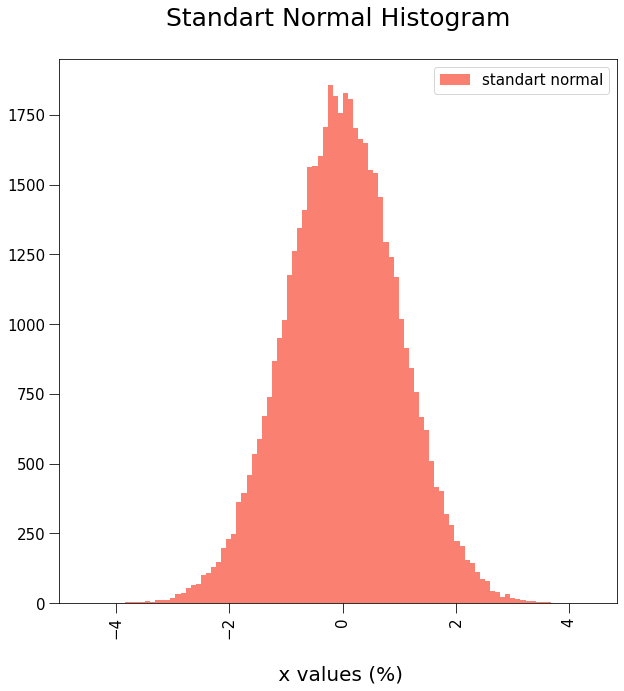

In [144]:
# generate a gaussian dataset - standart noram (mean = 0 varience = 1) of a certain size

size = 50000

stand_norm = np.random.randn(size)

print(f'The mean of the dataset is {np.round(stand_norm.mean(),2)} with a standard deviation of {np.round(stand_norm.std(),2)}.\n')

# PLotting Histogram
plt.figure(figsize = (10,10))

plt.hist(stand_norm, bins  = 100, color  = 'salmon', label = 'standart normal')

plt.legend(fontsize = 15)

plt.title("Standart Normal Histogram\n", fontsize=25)

plt.xlabel("\n x values (%)", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()



The mean of the dataset is -0.0 with a standard deviation of 0.5.



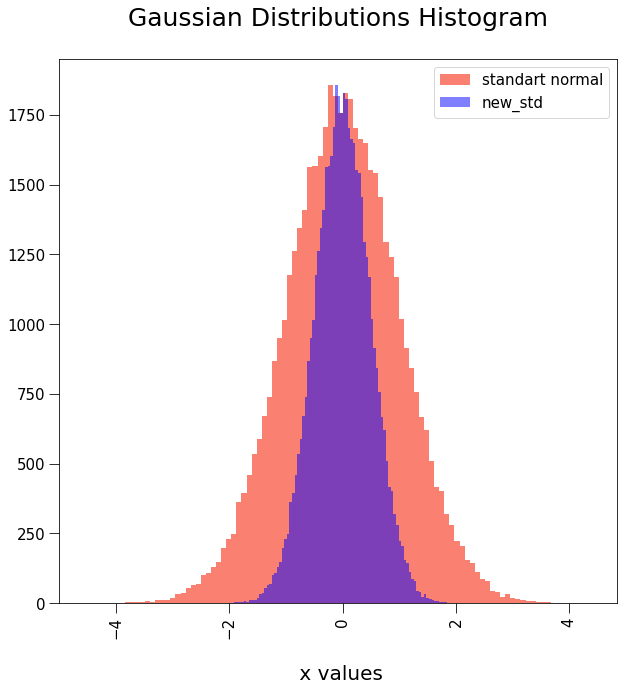

The mean of the dataset is 6.0 with a standard deviation of 0.5.



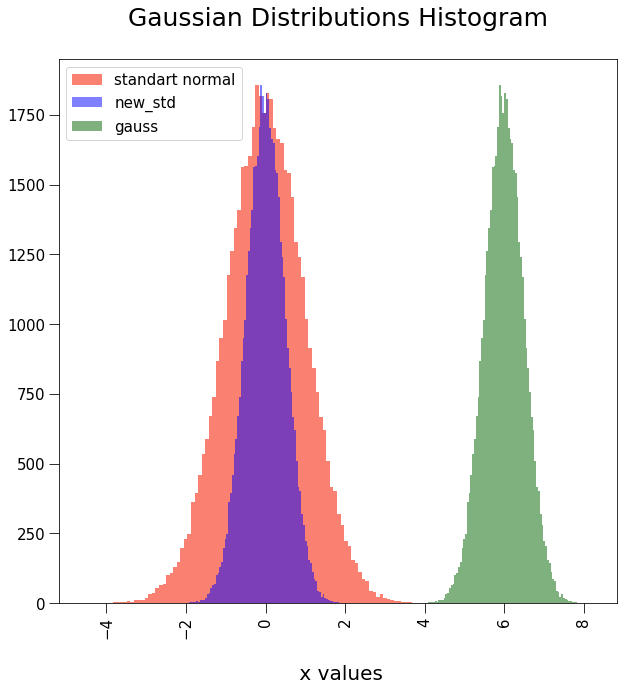

In [145]:
# Changing the standart devaiation of the distribution is equivalent to multiplying (spreading) the standart normal by the set amount

st_dev = 0.5

std_dev_dist = st_dev* stand_norm

print(f'The mean of the dataset is {np.round(std_dev_dist.mean(),2)} with a standard deviation of {np.round(std_dev_dist.std(),2)}.\n')

# Plotting the modification

plt.figure(figsize = (10,10))

plt.hist(stand_norm, bins  = 100, color  = 'salmon', label = 'standart normal')
plt.hist(std_dev_dist, bins  = 100, alpha  = 0.5, color  = 'blue', label = 'new_std')

plt.legend(fontsize = 15)

plt.title("Gaussian Distributions Histogram\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()



# Changing the mean of the distribution is equivalent to shifting the dataset by the set amount

mean = 6.0

gauss = st_dev* stand_norm + mean

print(f'The mean of the dataset is {np.round(gauss.mean(),2)} with a standard deviation of {np.round(gauss.std(),2)}.\n')

# Plotting the modification

plt.figure(figsize = (10,10))

plt.hist(stand_norm, bins  = 100, color  = 'salmon', label = 'standart normal')
plt.hist(std_dev_dist, bins  = 100, alpha  = 0.5, color  = 'blue', label = 'new_std')
plt.hist(gauss, bins  = 100, alpha  = 0.5, color  = 'darkgreen', label = 'gauss')


plt.legend(fontsize = 15)

plt.title("Gaussian Distributions Histogram\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()



**Problem 1:**
In this excercise, you will develop and write down (step by step) an algorithm that will normalize a gaussian distribution of a certain mean $\mu$ and variance $\sigma$. 

Then, you will implement the set algorithm on a generated dataset with a values for  $( \mu , \sigma )$ randomly picked from the ranges $( [0,10] , [0, 50] )$

Plot the histograms of your original and normalized datasets (together in one plot).

Don't forget to *label your axis*, show a *legend*, and *name your plot*!

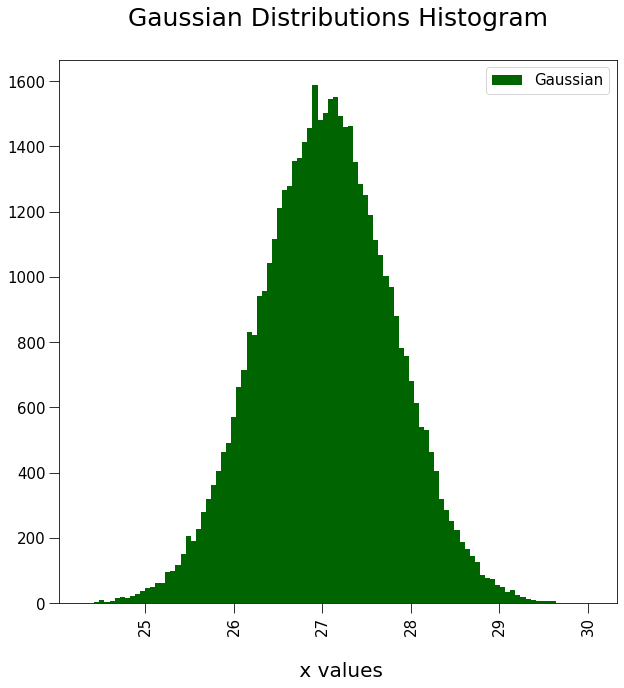

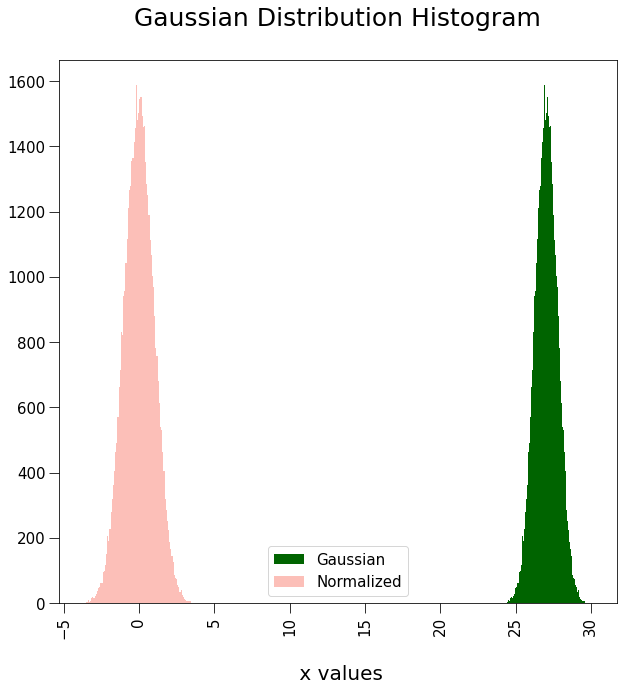

The mean of the dataset is 27.05 with a standard deviation of 0.75.
The mean of the normalized dataset is 0.0 with a standard deviation of 1.0.


In [148]:
# Solution:

# To normalize a Gaussian Distribution N(\mu, \sigma) to a standart normal, we do the reverse:
# - substract the mean and divide by the standart deviation

#strat with a gaussian with an unknown mean and standart deviation

my_gauss = (10 * np.random.rand()) * np.random.randn(size) + (50 * np.random.rand() )


plt.figure(figsize = (10,10))

plt.hist(my_gauss, bins  = 100, color  = 'darkgreen', label = 'Gaussian')

plt.legend(fontsize = 15)

plt.title("Gaussian Distributions Histogram\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()

# Normalizing the distribution

my_std_norm =  ( my_gauss - my_gauss.mean() ) / my_gauss.std()

plt.figure(figsize = (10,10))

plt.hist(my_gauss, bins  = 100, color  = 'darkgreen', label = 'Gaussian')
plt.hist(my_std_norm, bins  = 100, alpha  = 0.5, color  = 'salmon', label = 'Normalized')

plt.legend(fontsize = 15)

plt.title("Gaussian Distribution Histogram\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()

# To check we compare the means and variances

print(f'The mean of the dataset is {np.round(my_gauss.mean(),2)} with a standard deviation of {np.round(my_gauss.std(),2)}.')
print(f'The mean of the normalized dataset is {np.round(my_std_norm.mean(),2)} with a standard deviation of {np.round(my_std_norm.std(),2)}.')


**Section 2:**

Next, we're gonna perform a bit of analysis on a Gausian probability density function. 

For our analysis, we're gonna start with a standart normal case ($\mu = 0$, $\sigma = 1$), however keep in mind that you can normalize any Gaussian distribution through the procedure developed in Problem 1.

In [155]:
# All your function definitions should be presented at the begining of your code, however for this tutorial, 
# we will write it in the middle of the text due to the flow (let's see how many of you move this to the beginnning)

def gaussian(x, mu, sigma):
    f_x = (1 / np.sqrt(2*np.pi*sigma*sigma) ) * np.exp( - (x - mu)*(x - mu) / (2*sigma*sigma) ) 
    return f_x


In [156]:
low_limit = -100
high_limit = 100
dx = 0.01

x = np.arange(low_limit, high_limit, dx) # x axis from low_limit to high_limit in steps of dx

sigma = 1
mu = 0

P_x = gaussian (x, mu, sigma)



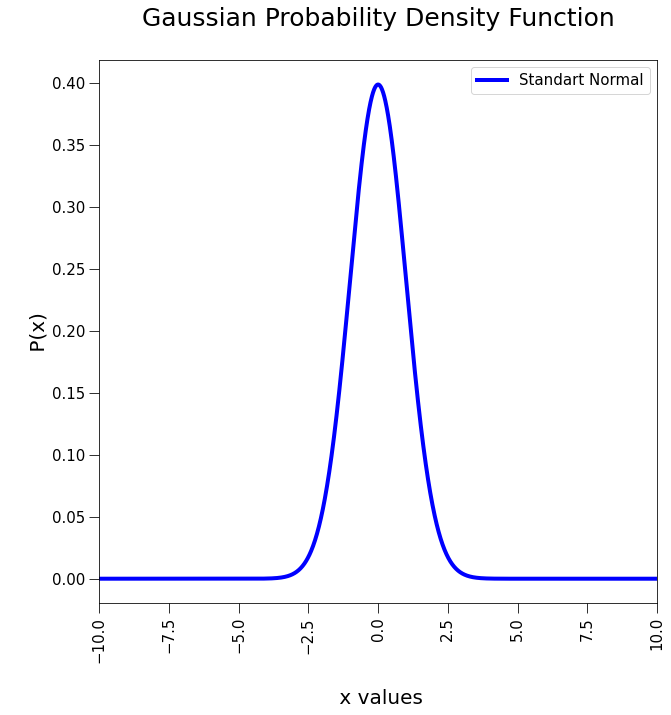

In [157]:
plt.figure(figsize = (10,10))

plt.plot(x, P_x, color = 'blue', linewidth = 4.0, label = 'Standart Normal')

plt.xlim(-10,10)

plt.legend(fontsize = 15)

plt.title("Gaussian Probability Density Function\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)
plt.ylabel("\n P(x) ", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()

**Problem 2:**

For this excercise you will prove the Emperical Rule that you used to check for outliers in *Lab 1* using $\sigma, 2\sigma,$ and $4\sigma$ intervals. The `integrate.quad()` function from the `scipy` library will serve you useful. Explain your results. 

In [158]:
# Solution

for n in range(1,6):
  I = quad(gaussian, -n*sigma, n*sigma, args=(mu, sigma))[0]
  print(f'The {n}\u03C3 interval contains {np.round(I*100,1)} % of the data.')

The 1σ interval contains 68.3 % of the data.
The 2σ interval contains 95.4 % of the data.
The 3σ interval contains 99.7 % of the data.
The 4σ interval contains 100.0 % of the data.
The 5σ interval contains 100.0 % of the data.


Now let's consider the Cummulative Distribution Function (CDF):


\begin{align*}
F_{Z}(z) &= P(Z \leq z) \\
        &= \int_{-\infty}^{z} P(x) dx
\end{align*}

and the Inverse Cumulative Distribution Funcion (ICDF). In of the distribution function $F_Z$, the ICDF $Q(p)$ returns a value $z$ such that:

$$
F_{Z}(z) := P(Z \leq z) = p
$$

**Problem 3:**

For this excercise, you will integrate a standart normal distribution to find the CDF $F_Z(z < 1.25)$. Then to check your result you can use the `stats.norm.cdf()` function from the `scipy` library. Explain the meaning of your results.
\\

For next part, you will find the ICDF for $p = 10\%$ of the Gaussian $N(25,4)$. The `stats.norm.ppf()` could be useful. Check that the result you got agrees by finding the CDF where $z$ is the answer you found. Explain the meaning of your results.

In [159]:
# Solution

#CDF

z = 1.25

I = quad(gaussian, -np.inf, z, args=(mu, sigma))[0]
I_check = norm.cdf(z)

print(f'The integral method: F(Z<{z})  =  {np.round(I,2)}.')
print(f'The scipy check:     F(Z<{z})  =  {np.round(I_check,2)}.')

# ICDF

mean_gauss = 25
sigma_gauss = 4

p = 0.1
Q = norm.ppf(p)

Q_gauss = sigma_gauss * Q + mean_gauss

print(f'\nThe ICDF result:     Q(p={p*100}%) = {np.round(Q_gauss,2)}.')

check_p = quad(gaussian, -np.inf, Q_gauss, args=(mean_gauss, sigma_gauss))[0]

print(f'\nCheck that p={np.round(check_p*100,2)}% is the same using the integral method: p_check={np.round(check_p*100,2)}%.')

The integral method: F(Z<1.25)  =  0.89.
The scipy check:     F(Z<1.25)  =  0.89.

The ICDF result:     Q(p=10.0%) = 19.87.

Check that p=10.0% is the same using the integral method: p_check=10.0%.
